<a href="https://colab.research.google.com/github/thisalmadu/ML-Project/blob/main/Cal_data_set_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Code to fetch housing data


In [20]:
import os
import tarfile
import urllib

download_root = "https://raw.githubusercontent.com/ageron/handson-m12/master/"
#download_root = "https://github.com/mohitgupta-omg/Kaggle-California-Housing-Prices"
housing_path =os.path.join("datasets","housing")
housing_url = download_root+ "datasets/housing/housing.tgz"

In [21]:
def fetch_housing_data(hu=housing_url, hp =housing_path):
  os.makedirs(hp,exist_ok=True)
  tgz_path = os.path.join(hp,"housing.tgz")
  urllib.request.urlretrieve(hu,tgz_path)
  housing_tgz = tarfile.open(tgz_path)
  housing_tgz.extractall(path=housing_path)
  housing_tgz.close()

Callinig the above function to create "dataset/housing" directory in the worksplace and downlad "housing.tgz" file and extarct the housing.csv file

In [22]:
import pandas as pd
import numpy as np
csv_file_path = "datasets/calfornia_housing.csv"

In [23]:
# loading data
def load_housing_data(csv_path):
  #csv_path = os.path.join(data_path,cfile)
  return pd.read_csv(csv_path)

In [24]:
housing= load_housing_data(csv_file_path)
housing.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [25]:
housing.info()  # gives a description of the attributes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [26]:
housing["ocean_proximity"].value_counts() # see the othe values in "ocean_proximity" feature and count of each category

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [27]:
housing.describe()  # gives some descriptive statistics of the features(null values are ignored)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


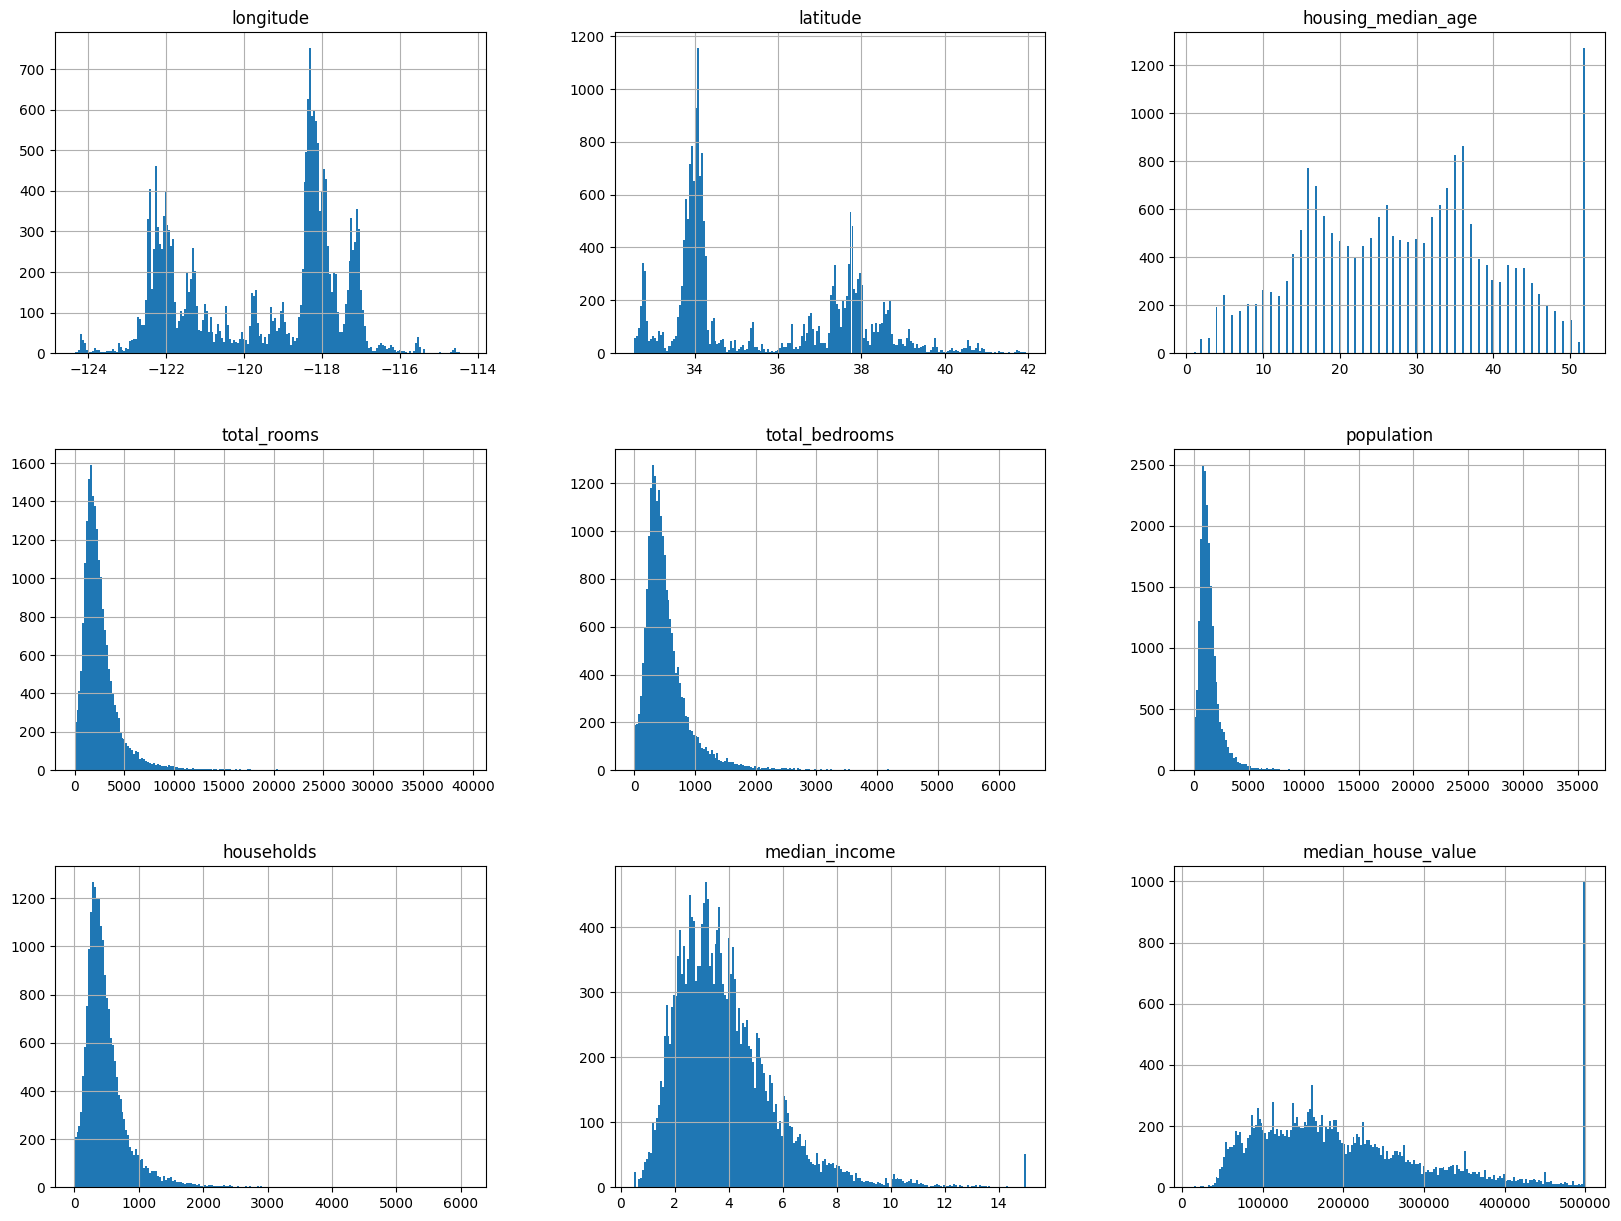

In [28]:
import matplotlib.pyplot as plt
housing.hist(bins=200,figsize=(20,15)) # show the data in a histogram
plt.show()

# Create a Test set
Creating test set is theritically simple. Pick some instances randomly, typically 20% of the data set (or less if your data set is too large). And keep them aside => 80% for the training set

In [29]:
#from IPython.testing import test
def split_train(data, test_rat):
  # np.random.seed(42) => always generate same shuffled indices
  shuffled_indices = np.random.permutation(len(data))
  test_set_size = int(len(data)* test_rat)
  test_ind = shuffled_indices[:test_set_size]
  train_ind = shuffled_indices[test_set_size:]
  return data.iloc[train_ind], data.iloc[test_ind]

In [30]:
train_set,test_set = split_train(housing,0.2)

In [31]:
len(train_set)  # 80% as training data

16512

In [32]:
train_set.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
7065,-118.04,33.94,37.0,1328.0,273.0,1115.0,275.0,4.2051,164400.0,<1H OCEAN
19676,-121.63,39.16,7.0,1879.0,444.0,1065.0,410.0,2.4183,103800.0,INLAND
18672,-121.92,36.95,29.0,3457.0,699.0,1327.0,563.0,3.6597,252300.0,NEAR OCEAN
2288,-119.75,36.78,28.0,3257.0,752.0,1981.0,712.0,2.2930,71700.0,INLAND
19500,-121.03,37.67,24.0,2162.0,459.0,1468.0,441.0,3.1857,98300.0,INLAND


In [33]:
len(test_set) # 20% as test data

4128

And there is a possibility to split the data set by the index as well. but here this housing data does not have a index column. Therefore make a index column and split by the index is also possible here

In [34]:
from zlib import crc32
def test_set_check(identifier, test_rat):
    return crc32(np.int64(identifier)) & 0xffffffff < test_rat*2**32

In [35]:
housing_with_id = housing.reset_index() # adds an 'index'column

In [36]:
housing_with_id.head(5)

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [37]:
def split_train_test_by_index(data, test_rat, id_col):
    ids = data[id_col]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_rat))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [38]:
in_train_set,in_test_set = split_train_test_by_index(housing_with_id,0.2,"index")

In [39]:
in_train_set.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
6,6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY


if the row index is a unique identifier it must be maade sure that new data gets append to the end of the data se and no rows ever gets deleted. If this is not possible you have to build a unique identifier. For example here latitude and longitude of a district possibly stable for few years so you can combine them and make a unique ID

In [40]:
housing_with_id["id"] = housing["longitude"]*1000+housing["latitude"]
train_set_id, test_set_id = split_train_test_by_index(housing_with_id,0.2,"id")

In [41]:
train_set_id.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,-122192.12
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,-122182.14
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,-122202.15
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,-122212.15
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,-122212.15


## Split Data into multiple subsets

**Skit-Learn** provides some functions to split a data set into multiple subsets. simplest one is **train_test_split()**, which is almost the same as above defined **split_train_test()** with a couple of additional features


In [42]:
from sklearn.model_selection import train_test_split

In [43]:
train_set_new, test_set_new = train_test_split(housing, test_size=0.2, random_state=42)

In [44]:
train_set_new.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND


# Stratified/ Random Sampling

suppose the median income will be a very important attribute to predict median housing price. It is vital to ensure that thetest set is representative of the various categories of incomes in the whole dataset. Since the median income is a continuous numerical valur first we create a "income category attribute" to categorize some median income values to a certain stratum. By looking at the figure it can be seen that the median vaues are clustered around 1.5 -6. And there are few goes even beyond 6. The following command "pd.cut()" enables to create this sort of a income category attribute with 5 categories.

In [45]:
housing["income_cat"] = pd.cut(housing["median_income"],  # create the new categorical attribute "income_cat"
                              bins=[0., 1.5, 3.0, 4.5, 6., np.inf], # label 1 : 0-1.5, label 2: 1.5-3.0, and so on ...
                              labels=[1, 2, 3, 4, 5])      # with five categories

<Axes: >

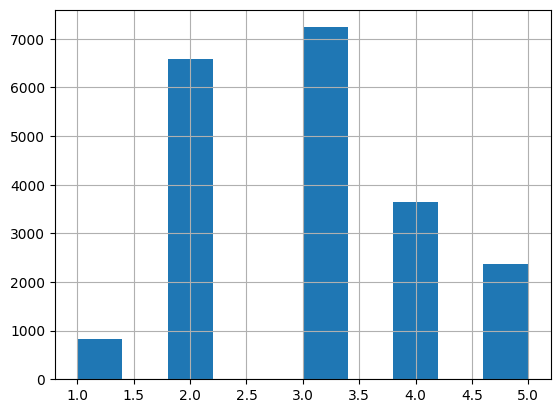

In [46]:
housing["income_cat"].hist()

It is important to have enough instances on each of this stratum, otherwise the estimate of a stratum's importance may be biased (means should not have too many strata, and each strata should be large enough)

Now stratified sampling is possible based on the "income_cat" with Scikit-Learn's class "StratifiedShuffleSplit" 

In [47]:
from sklearn.model_selection import StratifiedShuffleSplit

In [48]:
str_split = StratifiedShuffleSplit(n_splits=1, test_size= 0.2, random_state= 42) # test_size = proportion of the dataset to include in the test split
# refer : https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html
for train_ind, test_ind in str_split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_ind]
    strat_test_set = housing.loc[test_ind]

Seeing the proportions of each income category to make sure the stratified sampling was done correct

In [49]:
strat_test_set["income_cat"].value_counts()/len(strat_test_set) # value_count = frequencies

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

Now we can do the same for the full data set("housing") and compare the results with stratified sampling set "strat_test_set" results

In [50]:
housing["income_cat"].value_counts()/len(housing)

income_cat
3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: count, dtype: float64

It is evident that our sampling method was successfull that it represents the whole set really well. And also the error of stratified sampling also can be calculated as follows:

In [51]:
strat_sample = strat_test_set["income_cat"].value_counts()/len(strat_test_set)
full_set = housing["income_cat"].value_counts()/len(housing)
strat_error = (strat_sample - full_set)/ full_set*100

In [52]:
strat_error

income_cat
3   -0.013820
2   -0.015195
4    0.027480
5   -0.084674
1    0.364964
Name: count, dtype: float64

And this results can also be checked against the "random sampling" as well. since we have already done the random sampling above just invoking the random sampled data:

In [53]:
train_rand, test_rand = train_test_split(housing, test_size=0.2, random_state=42) # random sampling

Now checking the propotions for the randomly sample as well

In [54]:
test_rand_prop = test_rand["income_cat"].value_counts()/len(test_rand["income_cat"])

In [55]:
test_rand_prop

income_cat
3    0.358527
2    0.324370
4    0.167393
5    0.109496
1    0.040213
Name: count, dtype: float64

In [56]:
# Checking the error on random sampling
(test_rand_prop - full_set)/ full_set*100

income_cat
3    2.266446
2    1.732260
4   -5.056334
5   -4.318374
1    0.973236
Name: count, dtype: float64

comparing this with the "strat_error" Its obvious to see that stratified sampling error is much less. But this analysis is based upon the fact that there is a strong categorical representation in the data set by the "median_income"

In [57]:
# At the end removing the "income_cat" attribute to make the data back on its original format
for set_ in (strat_train_set, strat_test_set ):
    set_.drop("income_cat", axis=1, inplace=True)

# Visualization of Data

In [58]:
# make a copy of the original data set (then no harm on the original training set)
housing = strat_train_set.copy()

## Visualizing Geographical data

<Axes: xlabel='longitude', ylabel='latitude'>

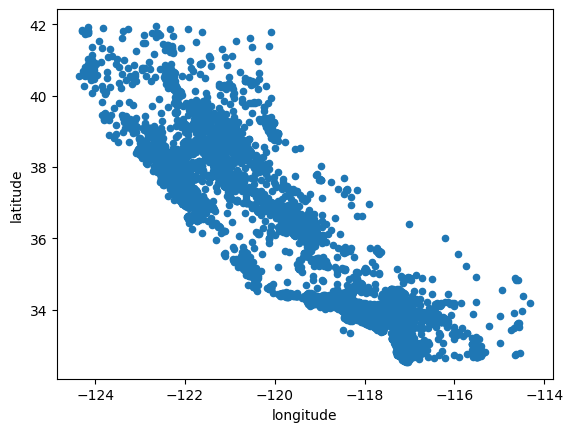

In [59]:
# creating a scatter plot of all districts to visualize the data
housing.plot(kind="scatter", x="longitude", y="latitude")

It is hard to see any particular pattern in the above scatter plot. Setting a parameter called "alpha"=0.1 makes it much easier to visualize the high density data points

<Axes: xlabel='longitude', ylabel='latitude'>

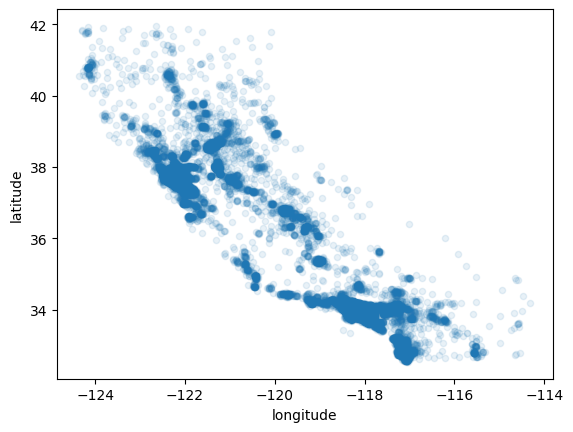

In [60]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

Using predefined color map, **s** for the (Jet) which ranges from blue (low value) to red (high value)

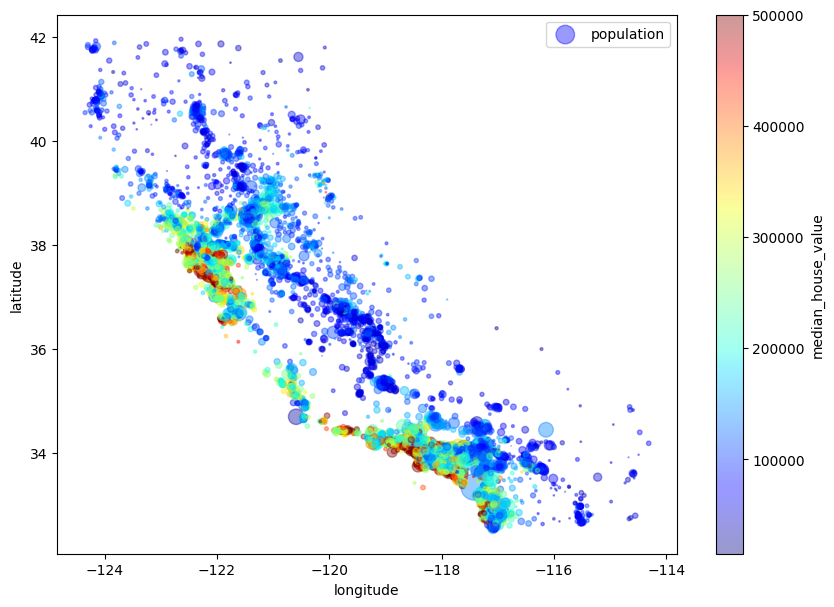

In [61]:
housing.plot(kind="scatter",x="longitude", y="latitude", alpha=0.4,s=housing["population"]/100, label="population", figsize=(10,7), c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)
plt.legend()

Above image consists of california housing prices: red is expensive, blue is cheap, larger circles indicate areas with a larger population.  And this idicates that proximity to the ocean is a greatly affect the housing prices as well. 

## Correlations

While checking for correlations, standard correlation coefficient (called Pearson's). the correlation between every pair of attributes is measured using "correlation matrix". 

In [62]:
corr_matrix = housing.corr()
corr_matrix

ValueError: could not convert string to float: 'INLAND'

To have a look about how each attribute correlates with median house value, we take correlation matrix just corresponds to the column "median_house_value"

In [63]:
corr_matrix["median_house_value"].sort_values(ascending=False)

NameError: name 'corr_matrix' is not defined

It indicates that median housing value is somewhat positively related with the median income, and it is somewhat negatively related with the location (lattitude and longitudes)

And using pandas "scatter_matrix()" to get the same correlation matrix visually: but for the simplicity using only 4 attributes


array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

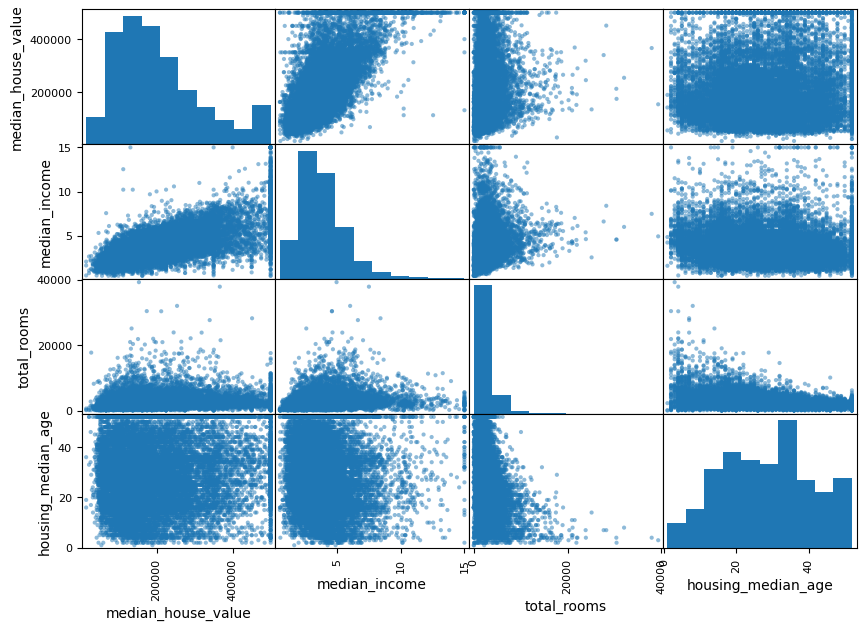

In [64]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(10,7))

As seen along the diagonal since it plotted each attribute against itself only bar charts are visible and therfore diagonal graphs not relavant to our study. And with the insight of previous correlations and also with this visualisations it is evidant that median income will be promising attribute to predict the median house value. Therefore taking that correlation scatter plot by zooming in

<Axes: xlabel='median_income', ylabel='median_house_value'>

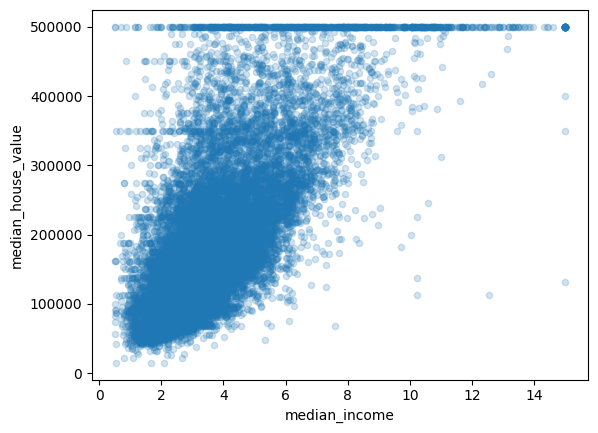

In [65]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.2)

it is seen that the correlation is so strong and therefore have a upward trend of meadian_house_value with the median_income. But sometimes due to **data quarks(data that falls outside the pattern of what is expected)** it may be difficult to predict the direct values that comes out of a graph.

## Attribute Combinations

It is important to try out various **attribute combinations** before preparing the data for a machine learning algorithm. Which means some attributes alone might not be meaningful for e.g. the total number of rooms in a district is not much of useful if you don't know how many households there are and the total number of bedrooms by itself is not very useful and may be needed to compare it to the number of rooms. And the **population per household** also seems like an interesting attribute combination to look at. Therefore let us make these new attributes 

In [66]:
housing["rooms_per_household"]= housing["total_rooms"]/housing["households"] # new attribute : rooms_per_household
housing["bedrooms_per_room"]= housing["total_bedrooms"]/housing["total_rooms"] # new attribute : bedrooms_per_room
housing["population_per_household"]= housing["population"]/housing["households"] # new attribute : population_per_household

Now checking the correlation matrix again for "median_house_value" with these newly made attributes:

In [67]:
new_corr_matrix = housing.corr()
new_corr_matrix["median_house_value"].sort_values(ascending=False)

ValueError: could not convert string to float: 'INLAND'

it is clear that the newly created attribute "bedrooms_per_room" is much more correlated with "median_house_value" than "total_rooms" or "total_bedrooms" but is is negatively correlated that means The housing value rises when bedrooms per room is lower. And also "rooms_per_ household is also more important than "total_rooms" given for a district and also they are supposed to be positively correlated.

# Prepare Data for ML algorithms

The most important step of the whole process is preparing data for a machine learning project. And for this it would be useful to write functions separately for each tasks that will he helpful to reproduce the transformations easily on any data set, And can be used as a library for the future projects when needed, And also this will enables to try different transfomations easily and choose which transformation would works best.

But first of all the training set that is yet to feed to the algorithm has to be cleaned first. And also the predictors and targets has to be separated as well because the same transformation don't have to be applied for both.

In [68]:
housing_pred = strat_train_set.drop("median_house_value", axis=1) # creates a copy of data without affecting data set without "median_hou_val"
housing_labels = strat_train_set["median_house_value"].copy()   # copy the labels into a separate data set

In [70]:
housing_pred.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN


In [71]:
housing_labels.head()

12655     72100.0
15502    279600.0
2908      82700.0
14053    112500.0
20496    238300.0
Name: median_house_value, dtype: float64

Now checking if there is any missing values in "housinf_pred"

In [72]:
housing_pred.isna().sum() #This returns the columns in our Pandas dataframe along with the number of missing values detected in each one 

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        158
population              0
households              0
median_income           0
ocean_proximity         0
dtype: int64

## Data cleaning

Most ML algorithms cannot work with missing features. w.r.t this data we observed that "**total_bedrooms**" attribute has some missing values to fix them either we have to get rid of the corresponding districts OR get rid of the whole attribute OR has to set the values to some value like zero.

In [73]:
# housing_pred.dropna(subset=["total_bedrooms"])  # get rid of corresponding districts (corresponding entries as a whole)
# housing_pred.drop("total_bedrooms", axis=1)    # get rid of whole attribute
median = housing_pred["total_bedrooms"].median() # set the values to some value (zero, mean, median, etc.)

If the last option is choosen, then median value can be computed for the available training set and the missing values can be filled with that. And this median might be useful to replace missing values later cases (missing values in test set and etc.)

In [74]:
housing_pred["total_bedrooms"].fillna(median, inplace=True)

Skit-Learn library provides a smart way to handle the missing values with **SimpleImputer**:
1) Creating a SimpleImputer instance, specifying that each missing value of an attribute is going to be replaced by the median of the attribute

In [75]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

2) Since the median only be calculated in numerical attributes, the categotical attributes has to be removed by copying it separately

In [76]:
housing_pred_num = housing_pred.drop("ocean_proximity", axis=1)

3) Fit Imputer instance to the training data using "fit()"

In [77]:
imputer.fit(housing_pred_num)

SimpleImputer(strategy='median')

imputer simply compute the median of each attribute and store the result in **statistics_** instance variable

In [78]:
imputer.statistics_  # computed statistics_ instance

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [79]:
housing_pred_num.median().values  # calculating median of each attribute without above instance to compare result

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

4) Using this trained imputer to transform the training set by replacing  missing values with the learned medians.

In [80]:
X = imputer.transform(housing_pred_num)

5) To put it back to Pandas Data Frame could be done as follows:

In [81]:
housing_trans = pd.DataFrame(X, columns=housing_pred_num.columns, index=housing_pred_num.index)
housing_trans.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964


### Handling Text and Categorical Attributes

Up to now dealt with mostly the numerical attributes. This section will discuss about how to analyze the text/categorial attributes of a data set. Let us select the text attribute "ocean_proximity" first

In [82]:
housing_categ = housing[["ocean_proximity"]]
housing_categ.sample(5)  # randomly select sample of 5 

,ocean_proximity
4698,<1H OCEAN
17376,<1H OCEAN
12470,INLAND
1808,NEAR BAY
17459,NEAR OCEAN


Since most machine learning algorithms prefer working with numbers, first we convert this categorical data to numerical data. For that we have to use some specific libraries in Scikit-Learn

In [83]:
from sklearn.preprocessing import OrdinalEncoder
Oe = OrdinalEncoder()

In [84]:
housing_cat_encoded = Oe.fit_transform(housing_categ)
housing_cat_encoded[:15] # transform each category to a corresponding numerical value

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [4.]])

And the list of categories can be obtained using **categories_** instance variable. It is a list containing ID array of categories for each categorical attribute.

In [85]:
Oe.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

A probabale misleading issue of this transform would be that ML algorithm assume that two nearby values are more similar than two distinct values(This may be fine in some cases, for e.g. grade="bad", "good", "excellent"). To fix this we use **one hot encoding** as follows

In [86]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()

In [87]:
housing_cat_1hot = cat_encoder.fit_transform(housing_categ)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

Converting this to a dense numpy array

In [88]:
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

Similarly get the list of categories through "categories_"

In [89]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

### Custom Transformers

Scikit-Learn has so many in-built functions. But prbably you may have to write your own tasks for the following purposes
* Custom cleanup operations.
* Combining specific attributes.

Python Scikit-Learn relies on duck typing (focuses on objects behaviour than its specific type class or class- no inheritance), A class can be implemented with three methods:

* **fit()** : Learn and estimate the parameters of the transformation
* **transform()** : Apply the learned transformation to new data
* **fit_transform()** : Learn the parameters and apply the transformation to new data

In [90]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6  # column indices

class CombinedAttributesAdder(BaseEstimator, TransformerMixin): # small transformer class that adds combined attributes
    def __init__(self, add_bedrooms_per_room = True):             # no *args or **kargs 
        self.add_bedrooms_per_room = add_bedrooms_per_room
    
    def fit(self, X, y = None):
        return self               # nothing else to do
    
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix]/ X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [91]:

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room = False)
# Check whether adding the new combined attribute is useful or not bu setting "add_bedrooms_per_room = True/ False"
housing_extra_attribs = attr_adder.transform(housing.values)

housing_extra_attribs = pd.DataFrame(housing_extra_attribs)
housing_extra_attribs.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND,5.485836,0.205784,3.168555,5.485836,3.168555
1,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN,6.927083,0.160714,2.623698,6.927083,2.623698
2,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.875,82700.0,INLAND,5.393333,0.191595,2.223333,5.393333,2.223333
3,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN,3.886128,0.276505,1.859213,3.886128,1.859213
4,-118.7,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN,6.096552,0.182692,3.167241,6.096552,3.167241


In the above example transformation has one **hyperparameter**, "add_bedrooms_per_room" by combining some other attributes and this allows to check easily whether adding this attribute helps ML algorithm or not.

### Transformation Pipelines

The data transformation steps need to be executed ina a right order. But Scikit-Learn provides the **Pipeline** class to help with such sequences of transformations.

In [92]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([    # Sequentially apply a list of transforms and a final estimator.
    ('imputer', SimpleImputer(strategy="median")),
    ('attribes_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

In [101]:
housing_pred_num.isna().head(5) # Display the null values in the numerical columns

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,False,False,False,False,False,False,False,False
15502,False,False,False,False,False,False,False,False
2908,False,False,False,False,False,False,False,False
14053,False,False,False,False,False,False,False,False
20496,False,False,False,False,False,False,False,False


In [98]:
housing_num_tr = num_pipeline.fit_transform(housing_pred_num)
housing_num_tr = pd.DataFrame(housing_pred_num)
housing_num_tr.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964


And by the above exmple you can see that how the transformation fills the null  values using the transformations like imputer, std_scaler and CombineAttributesAdder

And so fat it was about only applying the transformation to numerical columns. But it would be more convenient to have a single transformer which is able to handle all the numerical and catgorical columns, applying appropriate transformations to each numerical and categorical column. The Scikit learn has **ColumnTransformer** for this purpose. And this works great with pandas DataFrames.

In [106]:
from sklearn.compose import ColumnTransformer

num_attributes = list(housing_pred_num)
cat_attributes = ["ocean_proximity"]

full_pipeline =([
    ("num", num_pipeline, num_attributes),
    ("cat", OneHotEncoder(), cat_attributes),
])

In [108]:
housing_prepared = full_pipeline.fit_transform(housing)

AttributeError: 'list' object has no attribute 'fit_transform'